In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('./Live_20210128.csv')

In [42]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [43]:
df=df.drop(['Column1', 'Column2','Column3','Column4','status_id','status_published'], axis=1)

In [44]:
print(df['status_type'].unique()) 

['video' 'photo' 'link' 'status']


In [45]:
df_one_hot_encoded = pd.get_dummies(df, columns = ['status_type']) 

In [46]:
df_one_hot_encoded.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


In [47]:
df_one_hot_encoded.isnull().sum()

num_reactions         0
num_comments          0
num_shares            0
num_likes             0
num_loves             0
num_wows              0
num_hahas             0
num_sads              0
num_angrys            0
status_type_link      0
status_type_photo     0
status_type_status    0
status_type_video     0
dtype: int64

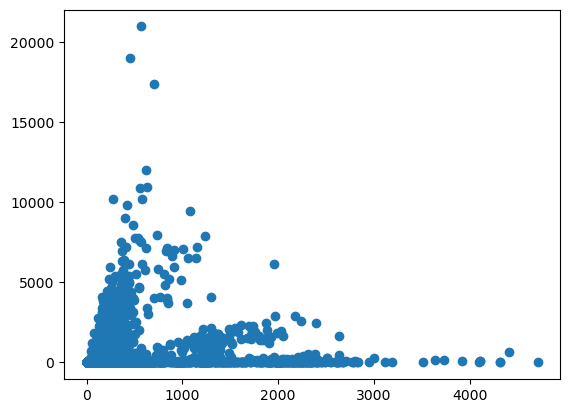

In [48]:
plt.scatter(df_one_hot_encoded.num_reactions, df_one_hot_encoded.num_comments)

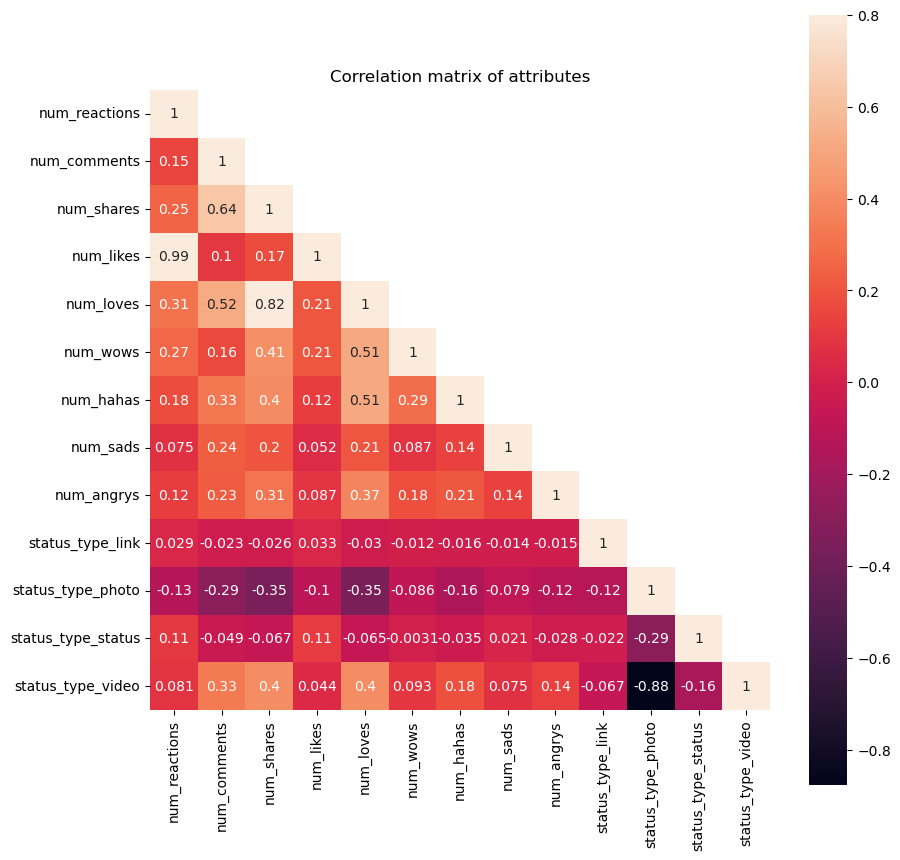

In [49]:
correMtr=df_one_hot_encoded.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
flg,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = df_one_hot_encoded
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[ 0.64610394  0.32335035  1.6868788  ... -1.24599285 -0.23366611
   1.42146599]
 [-0.17319166 -0.25220622 -0.3041444  ...  0.80257282 -0.23366611
  -0.70349907]
 [-0.00673846  0.01308938  0.12901714 ... -1.24599285 -0.23366611
   1.42146599]
 ...
 [-0.49312768 -0.25220622 -0.3041444  ...  0.80257282 -0.23366611
  -0.70349907]
 [ 0.26131603 -0.23871662 -0.13695924 ...  0.80257282 -0.23366611
  -0.70349907]
 [-0.46070173 -0.25220622 -0.3041444  ...  0.80257282 -0.23366611
  -0.70349907]]


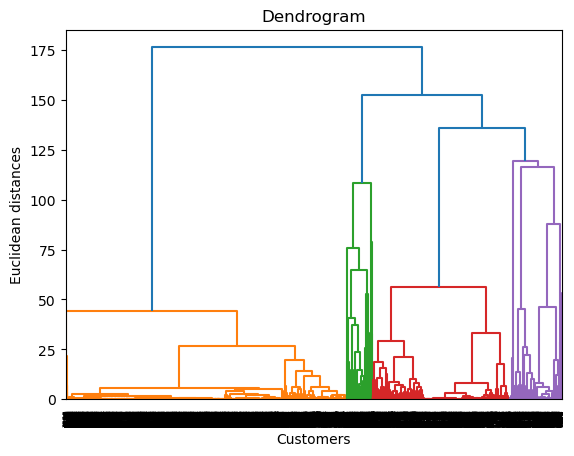

In [68]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(scale, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

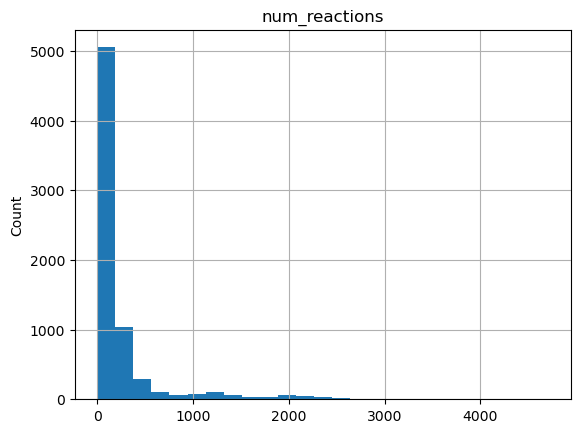

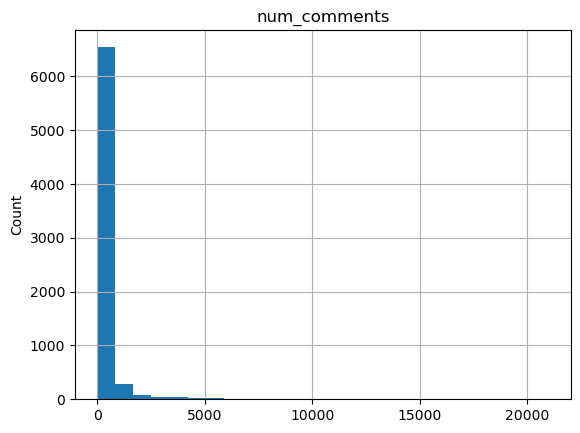

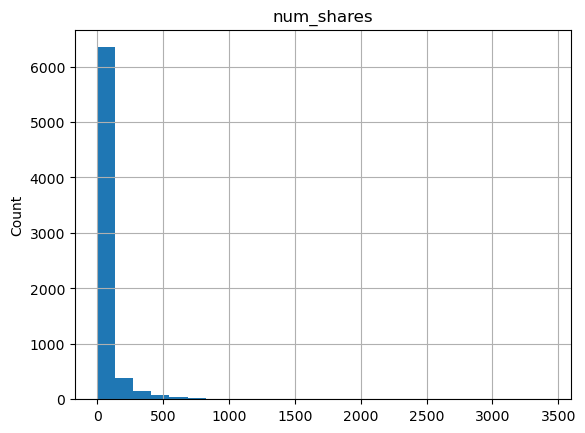

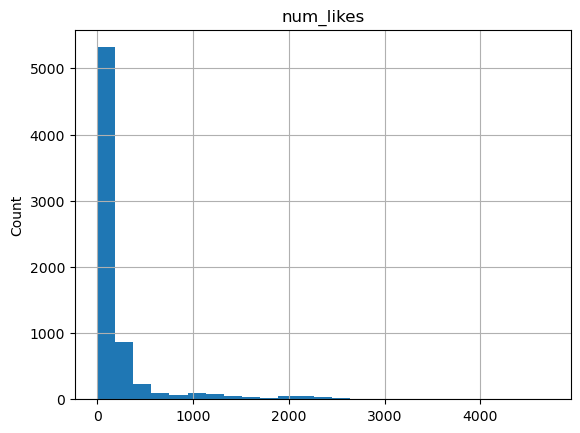

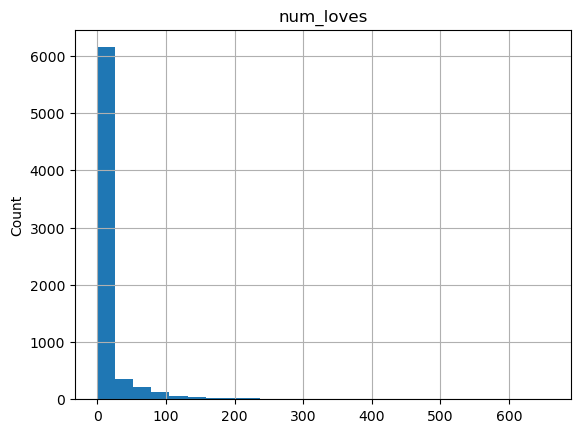

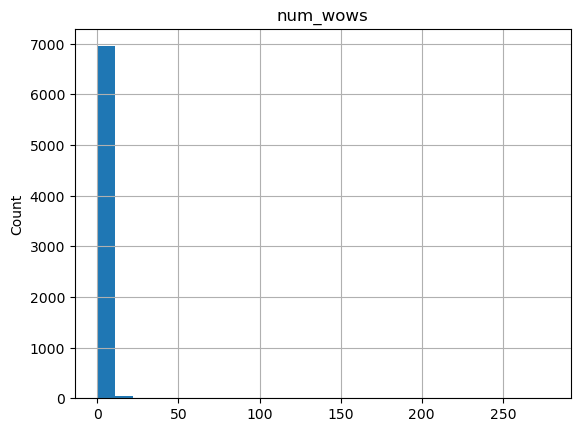

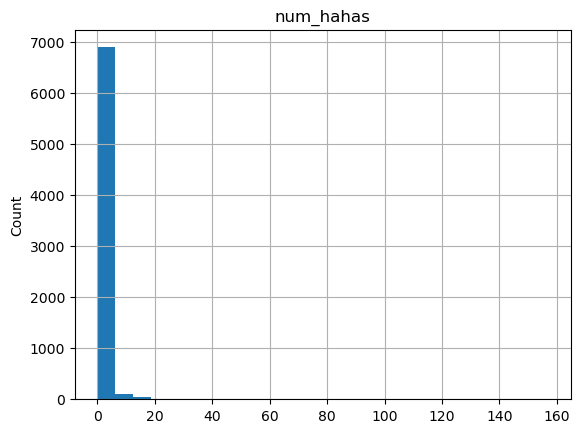

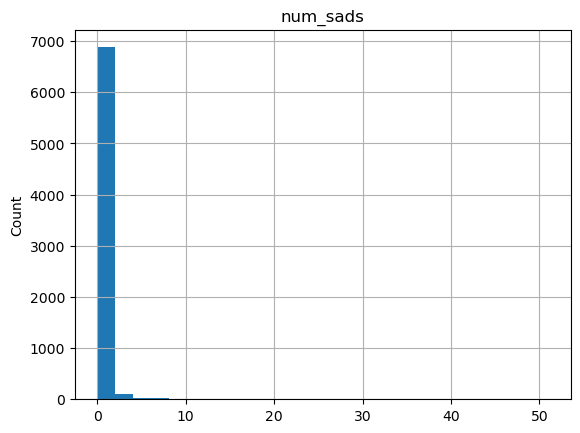

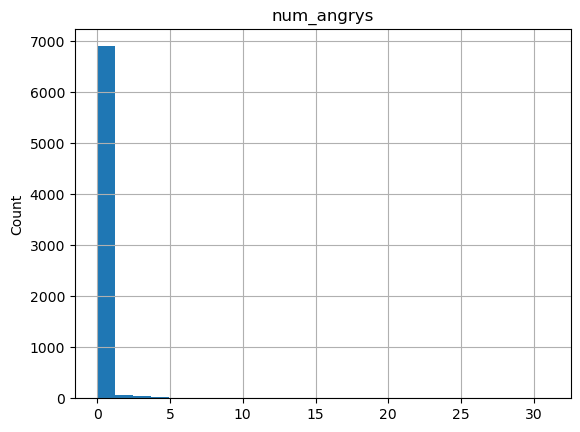

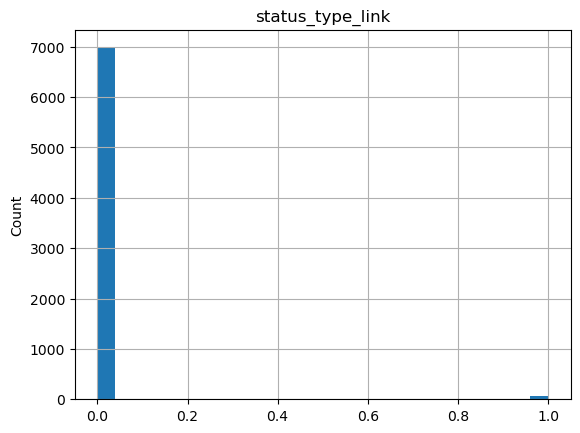

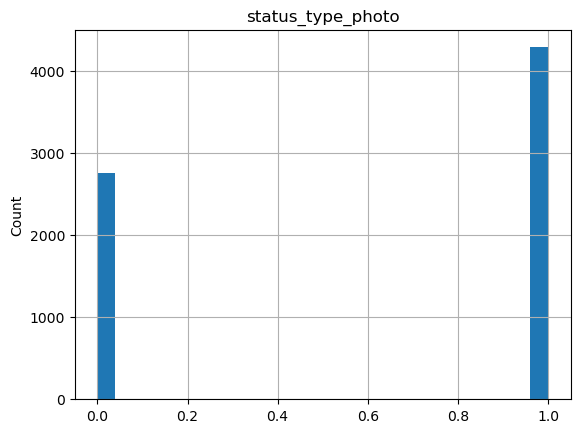

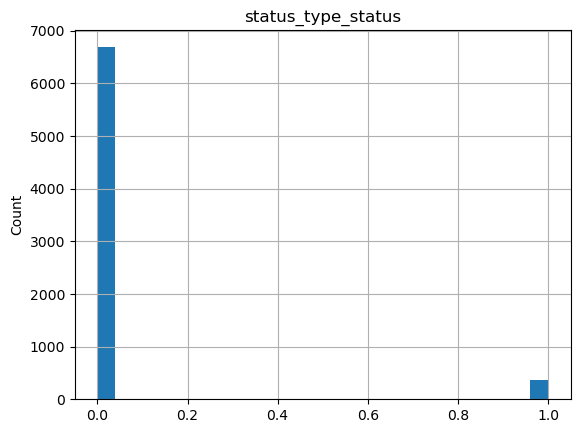

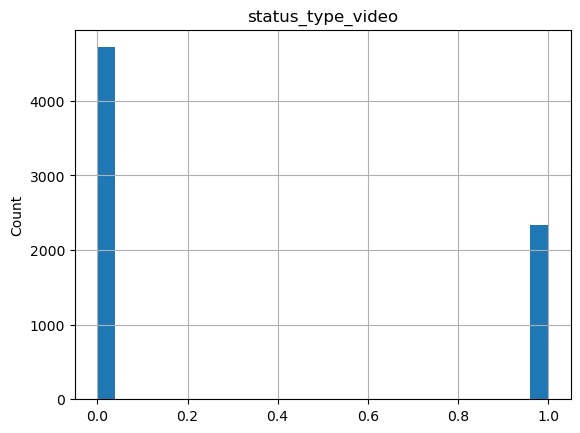

In [70]:
for feature in df_one_hot_encoded.columns:
    df_one_hot_encoded_data1 = df_one_hot_encoded.copy()
    df_one_hot_encoded_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

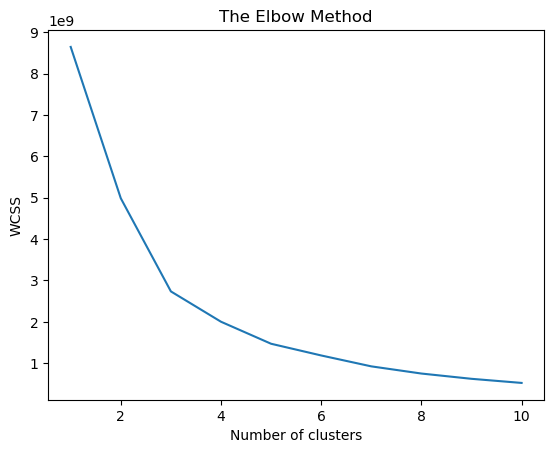

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_one_hot_encoded)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_one_hot_encoded)
label = kmeans.fit_predict(df_one_hot_encoded)

D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
df_one_hot_encoded[label==0]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


In [93]:
filtered_label2 = df_one_hot_encoded[label == 2]

In [98]:
filtered_label2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
99,1493,1979,753,1333,139,9,3,8,1,0,0,0,1
112,1005,25,1,979,16,9,1,0,0,0,1,0,0
166,4410,633,257,4315,73,17,5,0,0,0,1,0,0
343,1379,769,69,1131,234,4,4,2,4,0,0,0,1
355,1186,37,1,1161,19,6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,985,71,42,962,5,16,2,0,0,0,1,0,0
6272,1918,1,10,1917,0,1,0,0,0,0,1,0,0
6297,1228,6,1,1225,0,0,3,0,0,0,0,0,1
6523,1013,16,1,865,120,0,28,0,0,0,1,0,0
